In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\\Users\\joel\\Documents\\Notebooks\\.ipynb_checkpoints\\tumor data\\tumorData.csv')
print (df.shape)
df.head()
# a small dataset

(309, 18)


,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal,class
0,>=60,female,NaN,NaN,False,False,False,False,False,True,False,False,False,False,False,False,False,lung
1,>=60,male,NaN,poorly,False,False,False,False,False,True,False,False,False,True,False,True,False,lung
2,30-59,female,adefalse,NaN,False,False,False,True,False,False,False,True,False,False,True,False,False,breast
3,30-59,female,adefalse,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,ovary
4,30-59,female,adefalse,NaN,False,False,False,True,True,False,False,False,False,False,False,False,False,ovary


In [11]:
# creating a function for missing values dataframe
def missing(df):
    missing_val = pd.DataFrame(df.isnull().sum())
    missing_val = missing_val.reset_index()
    missing_val = missing_val.rename(columns = {'index':'variables',0:'missing_percentage'})
    missing_val['missing_percentage'] = (missing_val['missing_percentage']/df.shape[0])*100
    missing_val = missing_val.sort_values(by='missing_percentage',ascending=False)
    return missing_val

missing(df)

,variables,missing_percentage
3,degree-of-diffe,44.983819
2,histologic-type,21.035599
11,skin,0.323625
14,axillar,0.323625
1,sex,0.323625
0,age,0.000000
16,abdominal,0.000000
15,mediastinum,0.000000
13,supraclavicular,0.000000
12,neck,0.000000


In [9]:
# let's look at unique values
for i in df.columns:
    print (i,': ',df[i].unique())
           

age :  [2. 0. 1.]
sex :  [0. 1.]
histologic-type :  [0. 2. 1.]
bone :  [0. 1.]
bone-marrow :  [0. 1.]
lung :  [0. 1.]
pleura :  [0. 1.]
peritoneum :  [0. 1.]
liver :  [1. 0.]
brain :  [0. 1.]
skin :  [0. 1.]
neck :  [0. 1.]
supraclavicular :  [0. 1.]
axillar :  [0. 1.]
mediastinum :  [0. 1.]
abdominal :  [0. 1.]
class :  [11.  1. 12.  3. 14.  8. 19. 13. 10.  9. 16. 15.  7. 17.  6.  4. 18.  2.
  5.  0. 20.]


In [15]:
#imputation of missing-values
# dropping column 'degree-of-diffe' as it has 44% missing values, above limit of 30% missing values
# dataset needs imputation for columns 'sex','histologic-type','skin','axillar'
df.drop(['degree-of-diffe'],axis=1,inplace = True)
#import random
#from missingpy import KNNImputer # imputer library for python 3.5.2
# Doing KNN-imputation over the dataframe
#df = pd.DataFrame(KNNImputer(n_neighbors=3, weights="distance").fit_transform(df), columns = df.columns)

# converting categorical data to numeric-categorical data before imputation
for i in df.columns:
    print (i)
    print ('original data: ',set(df[i]))
    df[i] = pd.Categorical(df[i])
    df[i] = df[i].cat.codes
    df[i] = df[i].astype('object')
    print ('numeric data: ',set(df[i]))
    print ('\n')
    
df = df.replace(to_replace=-1,value = np.NaN)
# let's look at unique values again
for i in df.columns:
    print (i,': ',df[i].unique())
    
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp = imp.fit(df)
df = pd.DataFrame(data = imp.fit_transform(df.values),columns = df.columns)

missing(df)

age
original data:  {'30-59', '>=60', '<30'}
numeric data:  {0, 1, 2}


sex
original data:  {nan, 'female', 'male'}
numeric data:  {0, 1, -1}


histologic-type
original data:  {nan, 'adefalse', 'anaplastic', 'epidermoid'}
numeric data:  {0, 1, 2, -1}


bone
original data:  {False, True}
numeric data:  {0, 1}


bone-marrow
original data:  {False, True}
numeric data:  {0, 1}


lung
original data:  {False, True}
numeric data:  {0, 1}


pleura
original data:  {False, True}
numeric data:  {0, 1}


peritoneum
original data:  {False, True}
numeric data:  {0, 1}


liver
original data:  {False, True}
numeric data:  {0, 1}


brain
original data:  {False, True}
numeric data:  {0, 1}


skin
original data:  {False, True, nan}
numeric data:  {0, 1, -1}


neck
original data:  {False, True}
numeric data:  {0, 1}


supraclavicular
original data:  {False, True}
numeric data:  {0, 1}


axillar
original data:  {False, True, nan}
numeric data:  {0, 1, -1}


mediastinum
original data:  {False, True}
numeric

,variables,missing_percentage
0,age,0.0
9,brain,0.0
15,abdominal,0.0
14,mediastinum,0.0
13,axillar,0.0
12,supraclavicular,0.0
11,neck,0.0
10,skin,0.0
8,liver,0.0
1,sex,0.0


In [16]:
for i in df.columns:
    print (i,': ',df[i].unique())

age :  [2. 0. 1.]
sex :  [0. 1.]
histologic-type :  [0. 2. 1.]
bone :  [0. 1.]
bone-marrow :  [0. 1.]
lung :  [0. 1.]
pleura :  [0. 1.]
peritoneum :  [0. 1.]
liver :  [1. 0.]
brain :  [0. 1.]
skin :  [0. 1.]
neck :  [0. 1.]
supraclavicular :  [0. 1.]
axillar :  [0. 1.]
mediastinum :  [0. 1.]
abdominal :  [0. 1.]
class :  [11.  1. 12.  3. 14.  8. 19. 13. 10.  9. 16. 15.  7. 17.  6.  4. 18.  2.
  5.  0. 20.]


age


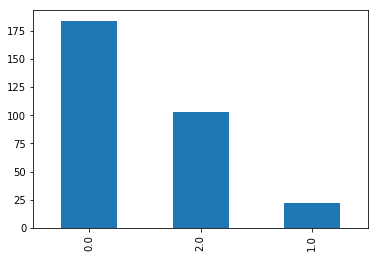

sex


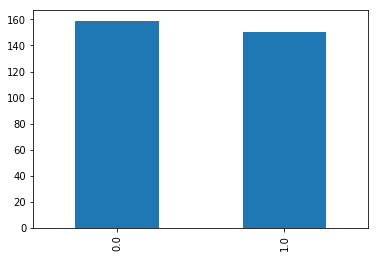

histologic-type


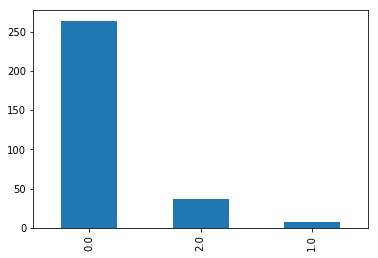

bone


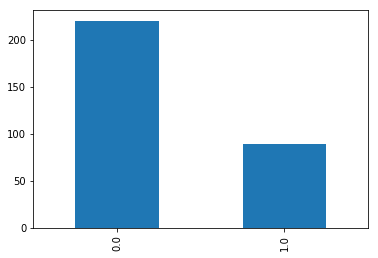

bone-marrow


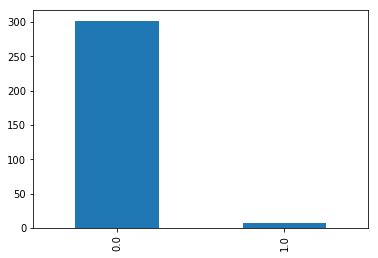

lung


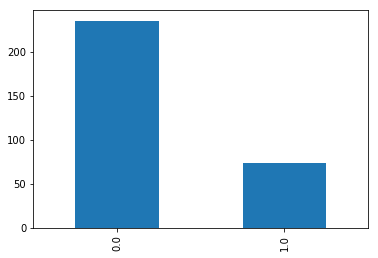

pleura


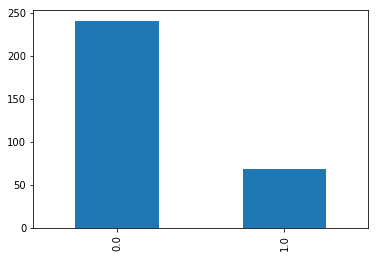

peritoneum


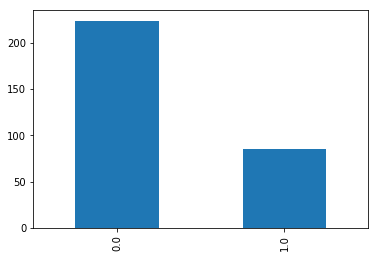

liver


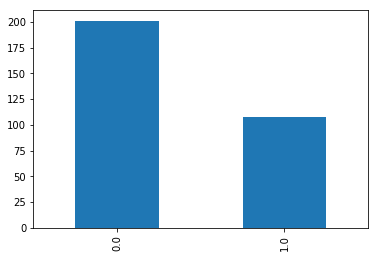

brain


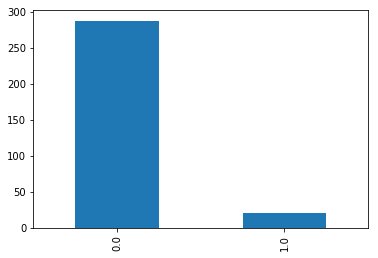

skin


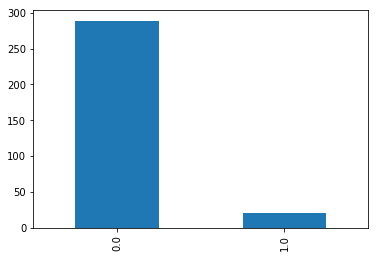

neck


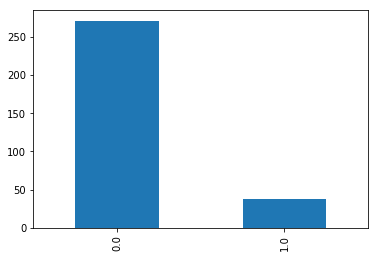

supraclavicular


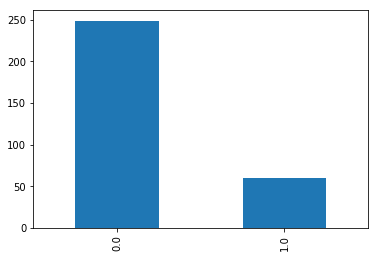

axillar


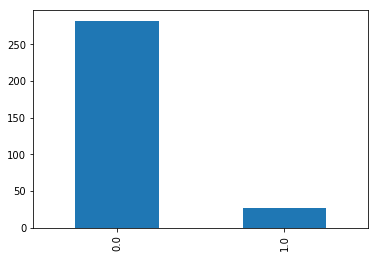

mediastinum


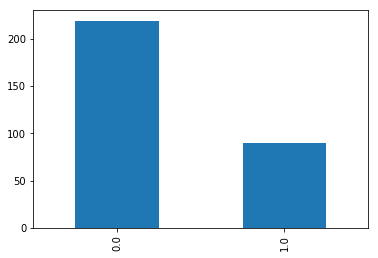

abdominal


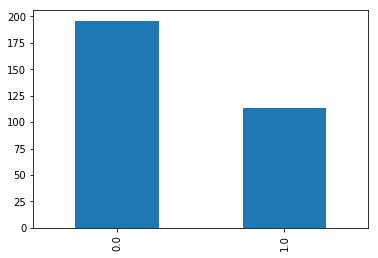

class


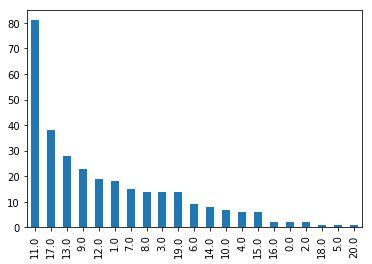

In [17]:
df.head(20)
for i in df.columns:
    print (i)
    df[i].value_counts().plot(kind='bar')
    plt.show()
# all independent variables are categorical and the target dependent variable too is a mutliclass variables, 
# all we could visualize is the count of each of these variables.         

In [18]:
# doing a chi2 contingency test would help us show which variables have a relationship with the target.
from scipy.stats import chi2_contingency

not_related=[]
for i in df.columns[:-1]:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['class'], df[i]))
    print(p)
    if p>0.05:
        print ('No relation with target')
        not_related.append(i)
    else:
        print ('Relation present')
    print ('\n')
    
not_related
# shows ['bone-marrow','pleura','brain','skin'] are not related as shown by ANOVA test
# let's also apply 2 more feature importance tests before we conclude which variables to keep and remove

age
0.04183261157610096
Relation present


sex
1.487034560593383e-11
Relation present


histologic-type
4.452730088912344e-11
Relation present


bone
1.9109541617509375e-08
Relation present


bone-marrow
0.9974737311413986
No relation with target


lung
0.005544436710494043
Relation present


pleura
0.2698915475547603
No relation with target


peritoneum
1.9286418608513214e-07
Relation present


liver
1.5177095198579764e-07
Relation present


brain
0.29716127814158877
No relation with target


skin
0.49669529935389956
No relation with target


neck
4.110213128113377e-21
Relation present


supraclavicular
7.065417165122757e-05
Relation present


axillar
7.328552483980596e-20
Relation present


mediastinum
4.5785080702030164e-07
Relation present


abdominal
5.9866536517919134e-06
Relation present




['bone-marrow', 'pleura', 'brain', 'skin']

C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.12728857 0.07376536 0.06064572 0.05083441 0.00678574 0.08678965
 0.07074631 0.05178148 0.0744076  0.03170397 0.0338353  0.06087924
 0.05393182 0.04943079 0.08435408 0.08281995]


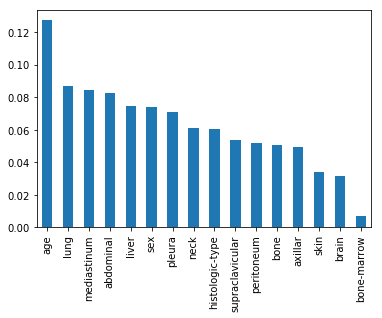

In [19]:
# let's perform two more feature selection techniques
# Let's perform a feature importance test
# this test gives you a score for each feature of your data, the higher score shows more importance/relevance 
# of that feature towards your target variable
# it uses a tree-based classifiers approach

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

X = df.iloc[:,:-1]
y = df['class']
importances = ExtraTreesClassifier().fit(X,y)
print (importances.feature_importances_)

# Let's look at the scores visually

values = pd.Series(importances.feature_importances_, index = df.columns[:-1])
values.nlargest(df.shape[1]-1).plot(kind='bar')
plt.figsize=(10,15)
plt.show()

# this test too shows bone-marrow, barin and skin as the least important variables
# but pleura is shown somewhere in the middle
# let's perform Random-Forest-Classifier feature selection test too
# before we finally decide on whcih features to keep

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = df.iloc[:,:-1]
sel_ = SelectFromModel(RandomForestClassifier())

sel_.fit(X, df['class'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())
selected_feat = X.columns[(sel_.get_support())] # gives the remaining features
print ('Random-forest based features selected: ')
print (selected_feat)
print ('\n')

print ('removable/unrelated: ',[i for i in df.columns[:-1] if i not in selected_feat])

# lasso-logistic feature selection model is showing like previous other tests that all the existing variables are necessary
# the Random-Forest feature selection method is shwoing that only ['age', 'fnlwgt', 'educational-num', 'relationship'] variables
# are important
# we'll create another dataframe with just ['age', 'fnlwgt', 'educational-num', 'relationship'] variables
# and develop some models over both dataframes to see which one gives better results, does the second dataframe actually reduce
# overfitting

[ True  True False  True False  True  True  True  True False False False
 False False False  True]
Random-forest based features selected: 
Index(['age', 'sex', 'bone', 'lung', 'pleura', 'peritoneum', 'liver',
       'abdominal'],
      dtype='object')


removable/unrelated:  ['histologic-type', 'bone-marrow', 'brain', 'skin', 'neck', 'supraclavicular', 'axillar', 'mediastinum']


In [24]:
# the random-forest feature selection method is showing more variables which are unrelated than what we previously
#  measured in ANOVA analysis
# what we can do is we can remove the 4 variables what were shown in ANOVA analysis (because 2 more test supported it)
# from the original df.
# Also, we can create another df2 that will have only features deemed important by the random-forest feature selection method 
# we will develop some models over both dataframes to see which one gives better results, 
# does the second dataframe actually reduce overfitting

df2 = df[['age', 'sex', 'bone', 'lung', 'pleura', 'peritoneum', 'liver','abdominal']] # 
df = df.drop(['bone-marrow','pleura','brain','skin'],axis=1) # as indicated by the ANOVA analysis
print ('df: ',df.columns)
print ('df2: ',df2.columns)

df:  Index(['age', 'sex', 'histologic-type', 'bone', 'lung', 'peritoneum', 'liver',
       'neck', 'supraclavicular', 'axillar', 'mediastinum', 'abdominal',
       'class'],
      dtype='object')
df2:  Index(['age', 'sex', 'bone', 'lung', 'pleura', 'peritoneum', 'liver',
       'abdominal'],
      dtype='object')


In [31]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as MAE

# split df
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2)
# split df2
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(df2,df.iloc[:,-1],test_size=0.2)

print ('df: ')
print ('X_train: ',X_train.shape,'Y_train:',Y_train.shape)
print ('X_test: ',X_test.shape,'Y_test: ',Y_test.shape)

print ('df2: ')
print ('X_train2: ',X_train2.shape,'Y_train2:',Y_train2.shape)
print ('X_test2: ',X_test2.shape,'Y_test2: ',Y_test2.shape)



def error_metrics(ytrue,ypreds):
    print ('accuracy_score: ',round(accuracy_score(ytrue,ypreds)*100,2),' %')
    print ('MAE: ',round(MAE(ytrue,ypreds),2),' %')


df: 
X_train:  (247, 12) Y_train: (247,)
X_test:  (62, 12) Y_test:  (62,)
df2: 
X_train2:  (247, 8) Y_train2: (247,)
X_test2:  (62, 8) Y_test2:  (62,)


In [32]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)
error_metrics(Y_test,DT_preds)

DT_model2 = DecisionTreeClassifier(criterion='entropy').fit(X_train2,Y_train2)
DT_preds2 = DT_model2.predict(X_test2)
error_metrics(Y_test2,DT_preds2)

accuracy_score:  22.58  %
MAE:  5.48  %
accuracy_score:  16.13  %
MAE:  5.52  %


In [33]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=30).fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
error_metrics(Y_test,RF_preds)

RF_model2 = RandomForestClassifier(n_estimators=30).fit(X_train2,Y_train2)
RF_preds2 = RF_model2.predict(X_test2)
error_metrics(Y_test2,RF_preds2)

accuracy_score:  33.87  %
MAE:  3.73  %
accuracy_score:  25.81  %
MAE:  4.53  %


In [34]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB().fit(X_train,Y_train)
NB_preds = NB_model.predict(X_test)
error_metrics(Y_test,NB_preds)

NB_model2 = MultinomialNB().fit(X_train2,Y_train2)
NB_preds2 = NB_model2.predict(X_test2)
error_metrics(Y_test2,NB_preds2)

accuracy_score:  38.71  %
MAE:  3.56  %
accuracy_score:  24.19  %
MAE:  3.89  %


In [35]:
from sklearn.neighbors import KNeighborsClassifier
K_model = KNeighborsClassifier(n_neighbors=5).fit(X=X_train, y=Y_train)
K_preds = K_model.predict(X_test)
error_metrics(Y_test,K_preds)

accuracy_score:  40.32  %
MAE:  3.71  %


In [ ]:
# comparing the accuracy and FNR on df and df2, df is the better dataset with necessar variables
# we will now begin developing deep-learning models over the data df

In [36]:

categorical = ['age', 'sex', 'histologic-type', 'bone', 'lung', 'peritoneum', 'liver',
                   'neck', 'supraclavicular', 'axillar', 'mediastinum', 'abdominal']

dependent = pd.DataFrame() # an empty deep-learning dataframe to begin with

# before we begin applying Keras Deep-learning module on the dataset,
# let's make the one hot encoded dataset for DL

for c in categorical:
    temp = pd.get_dummies(df[c],prefix=c)
    dependent=pd.concat([dependent,temp],axis=1)
    

target = pd.get_dummies(df['class'],prefix='class') # for one-hot-encoding the target


print (df.head(10))
print (dependent.head(10))
print (target.head(10))
print ('dependent: ',dependent.shape)
print ('target: ',target.shape)
# dependent:  (309, 26)
# target:  (309, 21)

   age  sex  histologic-type  bone  lung  peritoneum  liver  neck  \
0  2.0  0.0              0.0   0.0   0.0         0.0    1.0   0.0   
1  2.0  1.0              0.0   0.0   0.0         0.0    1.0   0.0   
2  0.0  0.0              0.0   0.0   0.0         0.0    0.0   0.0   
3  0.0  0.0              0.0   0.0   0.0         1.0    0.0   0.0   
4  0.0  0.0              0.0   0.0   0.0         1.0    0.0   0.0   
5  0.0  1.0              0.0   0.0   0.0         0.0    1.0   0.0   
6  0.0  1.0              0.0   1.0   0.0         0.0    0.0   0.0   
7  0.0  0.0              0.0   1.0   0.0         0.0    0.0   0.0   
8  0.0  1.0              0.0   0.0   0.0         0.0    0.0   1.0   
9  0.0  0.0              0.0   0.0   0.0         1.0    1.0   0.0   

   supraclavicular  axillar  mediastinum  abdominal  class  
0              0.0      0.0          0.0        0.0   11.0  
1              1.0      0.0          1.0        0.0   11.0  
2              0.0      1.0          0.0        0.0    1.

In [26]:
dependent.head(10)

,age,sex,histologic-type,bone,lung,peritoneum,liver,neck,supraclavicular,axillar,mediastinum,abdominal,class
0,2.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0
1,2.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,14.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0


In [39]:
from keras import models
from keras import layers

# because the dataset is too small, we need to apply k-fold cross validation over this dataset
# because less dataset can cause more overfitting and creating a validation data out of such small dataset would only capture 
# small variance of the entire dataset and then checking the error metrics of the model over such validation data-
# -would not yield good results
# create a function that returns a model designed as per our feature and problem requirements
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(26,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(21, activation='softmax')) # because of multi-class labels
    # defining the optimizer and loss and accuracy parameters
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model


train_data,test_data,train_targets,test_targets = train_test_split(dependent,target,test_size=0.2)
print ('train_data: ',train_data.shape,'test_data: ',test_data.shape)
print ('train_target: ',train_targets.shape,'test_target: ',test_targets.shape)

Using TensorFlow backend.
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

train_data:  (247, 26) test_data:  (62, 26)
train_target:  (247, 21) test_target:  (62, 21)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[[2.400161235058894, 0.360655740636294], [3.3339821197947517, 0.3442622982576245], [1.915415666142448, 0.49180327429146065], [2.468077190586778, 0.39344261122531576]]
mean - validation loss:  2.529409052895718  mean - validation accuracy:  0.3975409811026737


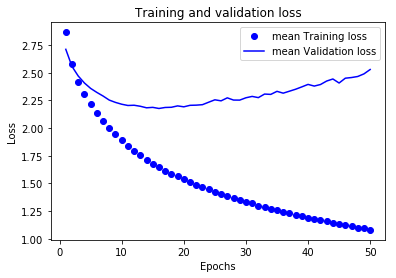

In [41]:
# the k-fold(4) model average

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 50 # we'll do the k-fold over 50 epochs
all_scores = [] # maintain a score of accuracy and loss of validation data over the different folds
loss = np.array([0*num_epochs])
val_loss = np.array([0*num_epochs])

# creating a loop for seperating training and validation data for every fold and storing their respective loss and accuracy values
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history =  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=8, validation_data =(val_data,val_targets),verbose=0) # with batch=1 we are going 'sgd'
    # has values training and validation loss
    loss = np.add(loss,history.history['loss'])
    val_loss = np.add(val_loss,history.history['val_loss']) 
    results = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(results) # results has values loss and accuracy
    
epochs = range(1, len(loss) + 1)
print (all_scores)
losses = [i[0] for i in all_scores]
acc = [i[1] for i in all_scores]
print ('mean - validation loss: ',np.mean(losses),' mean - validation accuracy: ',np.mean(acc))
# average loss and average accuracy over validation data of the 4 different folds of the dataset

# visualizing epochs vs loss graph
plt.plot(epochs, loss/4, 'bo', label='mean Training loss')
plt.plot(epochs, val_loss/4, 'b', label='mean Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()    

Train on 247 samples, validate on 62 samples
Epoch 1/15
247/247 [==============================] - 1s 4ms/step - loss: 2.6257 - acc: 0.2713 - val_loss: 2.5342 - val_acc: 0.2581
Epoch 2/15
247/247 [==============================] - 0s 1ms/step - loss: 2.3054 - acc: 0.3077 - val_loss: 2.4320 - val_acc: 0.2903

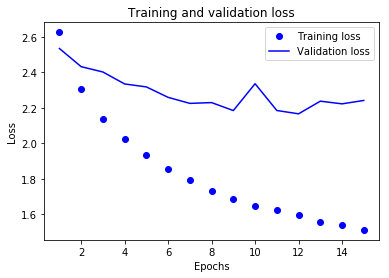

62/62 [==============================] - 0s 48us/step
loss :  1.6428581822303034
acc :  0.5483870967741935


In [46]:
# the validation loss comes down till 15 epochs after which it only increases
#  testing how one model scores with 15 epochs


ptrain_data,x_val,ptrain_targets,y_val = train_test_split(dependent,target,test_size=0.2)
model = build_model()
history = model.fit(ptrain_data,ptrain_targets,batch_size=1,epochs=15,validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results = model.evaluate(test_data,test_targets)
#help(model.evaluate)
for i in range(len(results)):
    print (model.metrics_names[i],': ',results[i])

In [ ]:
# at batch=1 and 15 epochs
# loss :  1.6569230479578818
# acc :  0.5483870967741935
# so reducing the epoch numbers worked

In [ ]:
# ---------------------------------------CONCLUSION---------------------------------------#

                Decision-Trees   Random-Forests  Naive-Bayes    KNN        DNN
accuracy_score:  22.58  %         33.87  %        38.71  %     40.32  %   54.83 %
MAE:              5.48             3.73            3.56         3.71       1.65
    
# we can see that Deep-Neural_network has the highest-accuracy and lowest-loss among all other ML models.
# so DNN would be as suitable model for this dataset.